# Time Series - Stock Price Prediction
## Part 2 - Data Preprocessing
This notebook focuses on processing the filtered dataset containing the historical prices of Google stocks over the past five years.

> **INPUT**: Filtered dataset containing Google's stock prices from the last six years, obtained from the previous phase. <br/>
> **OUTPUT**: Preprocessed and transformed data divided into training, validation, and testing subsets, stored in an interim location for the training phase.

### 1. INITIALIZATION

In [1]:
# Import necessary libraries and modules
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib
import matplotlib.dates as mdates

In [2]:
# Set output width
pd.set_option("display.width", 120)

### 2. LOADING DATASET

In [24]:
# Prepare data file location and name
data_file_location = "..//data//raw//"
data_file_name = "GOOG_6y"
data_file_ext = "csv"

# Load data file
data = pd.read_csv(data_file_location + data_file_name + "." + data_file_ext)

In [25]:
# Check loaded data shape
data.shape

(1508, 7)

In [30]:
# Check loaded data head
data.tail()

,index,Date,Close,High,Low,Open,Volume
1503,1503,2025-09-25,246.570007,247.315002,241.649994,244.839996,17379800
1504,1504,2025-09-26,247.179993,250.119995,246.639999,247.785004,16594600
1505,1505,2025-09-29,244.360001,251.647995,243.199997,248.274994,23157200
1506,1506,2025-09-30,243.550003,243.675003,239.570999,243.059998,22541200
1507,1507,2025-10-01,245.539993,247.149994,239.199997,241.179993,23947580


In [27]:
# Check columns types
data.dtypes

index       int64
Date       object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

### 3. DATA PREPROCESSING

#### Validate Data Types

In [28]:
# Convert date column to a valid Datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Check column types
data.dtypes

index              int64
Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object

#### Select Independent Features

The objective of this analysis is to implement a multi-variant prediction, taking into account possible impact of several independent features such as the Open price, Close price and Volume on future stock price performance.

Therefore, in this analysis, we will incorporate all the available variables: 
- Opening price
- Highest price
- Lowest price
- Closing price
- Adjusted closing price
- Trading volume

These features will be utilized to forecast the future opening price.

In [32]:
# Define selected features and target attribute
features = ["Open", "High", "Low",	"Close", "Volume"]
target = "Open"

#### Create Train, Validation, and Test Datasets

To monitor and assess the performance of our model, we will partition the recent stock price dataset into three segments: training, validation, and testing sets.

The division will be structured as follows:
- **Training dataset:** covering the period from the start of 2019 till June, 2023.
- **Validation dataset:** representing the stock prices from July, 2023 till the end of 2023.
- **Testing dataset:** representing the stock prices for the first two months of 2024.

In [33]:
# Define start and end time for each period
train_end_date = pd.to_datetime("2023-08-30")
validate_start_date = pd.to_datetime("2023-09-01")
validate_end_date = pd.to_datetime("2024-09-30")
test_start_date = pd.to_datetime("2024-10-01")
test_end_date = pd.to_datetime("2025-10-01")

# Split dataset into training, validation, and testing
data_train = data[data["Date"] <= train_end_date][features]
data_train_dates = data[data["Date"] <= train_end_date]["Date"]
data_validate = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)][features]
data_validate_dates = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)]["Date"]
data_test = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)][features]
data_test_dates = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)]["Date"]

In [34]:
# Display the shape of each dataset
print(f"Training Set: {data_train.shape}")
print(f"Validation Set: {data_validate.shape}")
print(f"Testing Set: {data_test.shape}")

Training Set: (985, 5)
Validation Set: (271, 5)
Testing Set: (251, 5)


In [35]:
# Display a summary of each dataset
print("Training Dataset:")
print(data_train.head())
print("Validation Dataset:")
print(data_validate.head())
print("Testing Dataset:")
print(data_test.head())

Training Dataset:
        Open       High        Low      Close    Volume
0  59.442219  59.442219  58.166449  58.431637  32302000
1  58.598993  59.048914  57.726462  58.987831  32424000
2  59.189454  60.160307  59.054377  60.039139  23248000
3  59.810700  60.496206  59.778420  59.973583  16858000
4  59.472516  59.894131  59.046431  59.052391  20786000
Validation Dataset:
           Open        High         Low       Close    Volume
986  137.489120  137.638109  135.016053  135.870209  16671600
987  135.512654  136.436325  134.638630  135.780823  17730200
988  136.083760  136.545596  133.774565  134.449936  15814300
989  133.685161  135.651699  133.049511  135.274277  16976000
990  134.946524  136.580348  134.946524  136.267487  17810700
Testing Dataset:
            Open        High         Low       Close    Volume
1257  168.124197  169.697314  165.177088  167.686111  18629500
1258  167.028953  168.144083  165.525539  166.580917  12745000
1259  165.097427  167.178316  164.649375  166.48

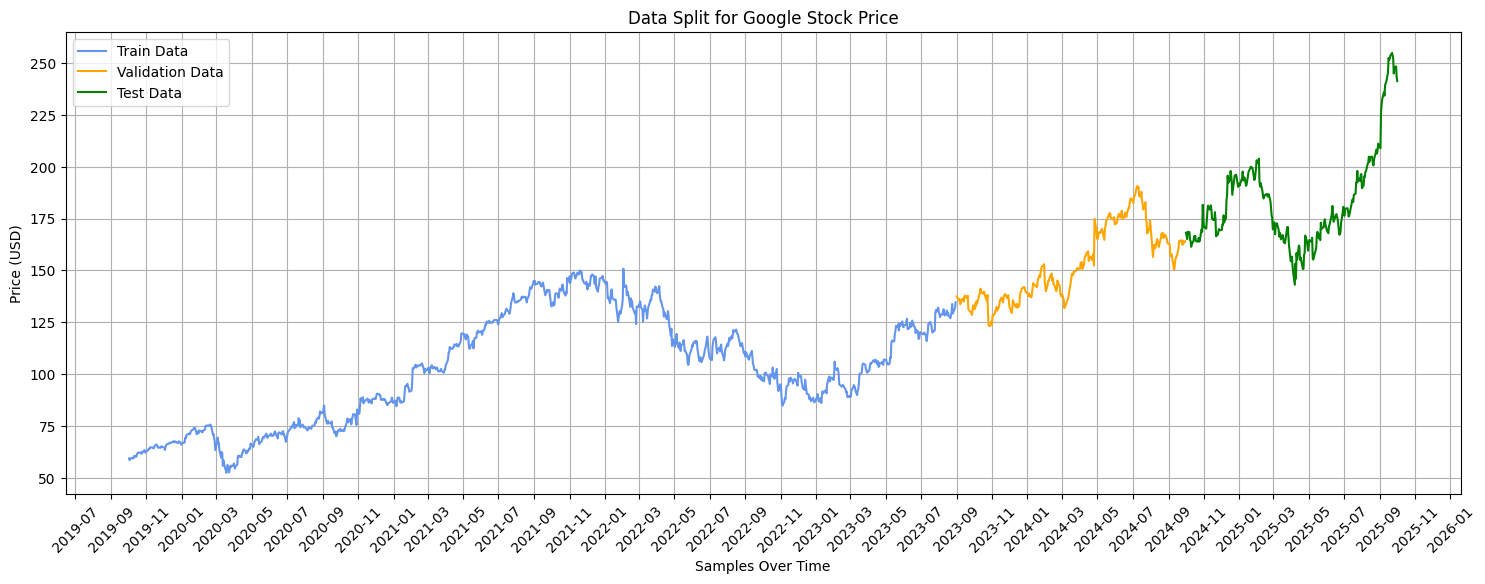

In [36]:
# Plot stock prices for each data split
plt.figure(figsize=(18,6))
plt.plot(data_train_dates, data_train["Open"], color="cornflowerblue")
plt.plot(data_validate_dates, data_validate["Open"], color="orange")
plt.plot(data_test_dates, data_test["Open"], color="green")
plt.legend(["Train Data", "Validation Data", "Test Data"])
plt.title("Data Split for Google Stock Price")
plt.xlabel("Samples Over Time")
plt.ylabel("Price (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.grid()

#### Data Scaling

In [37]:
# Check the distribution of input features
data[features].describe()

,Open,High,Low,Close,Volume
count,1508.000000,1508.000000,1508.000000,1508.000000,1.508000e+03
mean,125.082411,126.543324,123.769054,125.184197,2.688360e+07
std,40.343980,40.719141,39.964044,40.364104,1.237241e+07
min,52.466458,53.201929,50.332364,52.471924,6.809800e+06
25%,93.430515,94.661089,91.994583,93.529945,1.873888e+07
50%,125.511096,126.554949,124.240414,125.598747,2.404885e+07
75%,150.762928,153.223959,149.079804,150.907288,3.151395e+07
max,254.779999,256.700012,252.067993,255.240005,9.779860e+07


Looking at these details, it's noticeable and anticipated that all price values exhibit similar distributions given they log the price fluctuation on daily basis.

Conversely, the trading volume presents a distinct distribution that differs significantly.

Accordingly, input features need to be transformed into a unified scale and since the distribution doesn't indicate any outliers, we will use the [0,1] range to normalize all features.

To prevent data leakage, we will fit the scaler solely to the training data. Subsequently, we will use this fitted scaler to transform the training, validation, and testing datasets.

In [38]:
# Initialize scaler with range [0,1]
sc = MinMaxScaler(feature_range=(0,1))

# Fit and transform scaler to training set
data_train_scaled = sc.fit_transform(data_train)

# Transform validating and testing datasets
data_validate_scaled = sc.transform(data_validate)
data_test_scaled = sc.transform(data_test)

The scaler employed here will also be utilized in subsequent phases to revert the scaled data back to its original distribution. Therefore, it is essential to save this scaler to a local folder for future use.

In [39]:
# Prepare scaler model name and location
scaler_model_location = "..//models//"
scaler_model_name = "google_stock_price_scaler"
scaler_model_ext = "gz"

# Store scaler model
joblib.dump(sc, scaler_model_location + scaler_model_name + "." + scaler_model_ext)

['..//models//google_stock_price_scaler.gz']

### 4. STORING PROCESSED DATASETS

The training, validation, and testing datasets have been processed and are prepared for training the LSTM model in the next phase.

Prior to saving these datasets, it is necessary to reassemble the dates corresponding to each dataset. This will facilitate later evaluation of the model's performance.

In [40]:
# Combine dates with each corresponding dataset
data_train_scaled_final = pd.DataFrame(data_train_scaled, columns=features, index=None)
data_train_scaled_final["Date"] = data_train_dates.values

data_validate_scaled_final = pd.DataFrame(data_validate_scaled, columns=features, index=None)
data_validate_scaled_final["Date"] = data_validate_dates.values

data_test_scaled_final = pd.DataFrame(data_test_scaled, columns=features, index=None)
data_test_scaled_final["Date"] = data_test_dates.values

In [41]:
# Prepare datasets files and location
data_file_location = "..//data//processed//"
data_file_name_train = "google_stock_price_processed_train"
data_file_name_validate = "google_stock_price_processed_validate"
data_file_name_test = "google_stock_price_processed_test"
data_file_ext = "csv"

# Store datasets
data_train_scaled_final.to_csv(data_file_location + data_file_name_train + "." + data_file_ext, index=None)
data_validate_scaled_final.to_csv(data_file_location + data_file_name_validate + "." + data_file_ext, index=None)
data_test_scaled_final.to_csv(data_file_location + data_file_name_test + "." + data_file_ext, index=None)